# US YouTube Trending Video Analysis

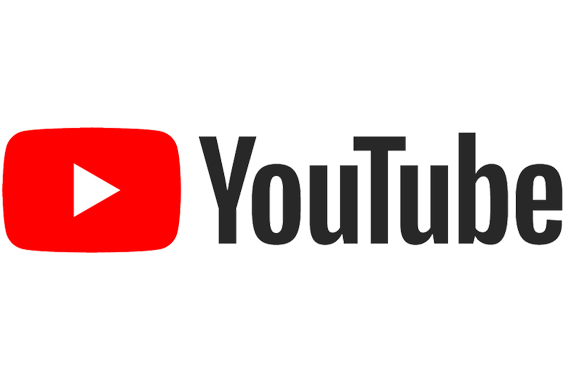

- **Dataset Source**
    - https://www.kaggle.com/datasnaek/youtube-new
    

- **Context of Dataset**
    - The dataset is a daily record of the top trending YouTube videos in the United States.
    - It contains 16 columns and 40,949 rows spanning the date range from November 2017 to June 2018
    - The original source provides an additional json file for category, which the raw dataset doesn't include.
    
    
- **Attribute Information**
    - video_id: ID of video recommended as trending video
    - trending_date: Date recommended as trending video
    - title: Title of video
    - channel_title: Channel title of video
    - category_id: ID of video category (associated with separate json file)
    - publish_time: Date and time when video was published
    - tags: Tags associated with video
    - views: Number of views on video
    - likes: Number of likes on video
    - dislikes: Number of dislikes on video
    - comment_count: Number of comments on video
    - thumbnail_link: Thumbnail link of video
    - comments_disabled: Whether or not comments disabled for video
    - ratings_disabled: Whether or not ratings disabled for video
    - video_error_or_removed: Whether or not video has error or removed.
    - description: Description of video
    
    
- **Table of Content**
    - [Preparing Data](#Preparing)
        - [Importing the Dataset](#Importing)
        - [Exploring the Dataset](#Exploring)
        - [Adding Category Information from Separate json File](#Adding)
        
    - [Descriptive Analysis (Exploring Attributes & Time-Series)](#Descriptive)
        - [Trending Video Types](#Trending)
        - [Number of Trending Days Distribution](#Number)
        - [Top 10 Most Viewed, Liked, Disliked and Commented Videos](#Top10)
        - [Daily Views, Likes, Dislikes, Comments](#Daily)
        - [Monthly Views, Likes, Dislikes, Comments](#Monthly)
        - [Average Views, Likes, Dislikes, Comments by Time](#Average)
        - [Average Views, Likes, Dislikes, Comments by Weekday vs. by Weekend](#Average2)
        - [Correlation Heatmap](#Heatmap)

    - [Natural Language Processing (Text Analysis)](#NLP)
        - [Word Cloud for Top 200 Tags](#200Tags)
        - [Sentiment Analysis (Polarity & Subjectivity) for 500 Descriptions](#Sentiment)
        - [Topics of 500 Descriptions](#Topics)

    - [Predictive Analysis (Machine Learning)](#Predictive)
        - [Linear Regression - predicting number of likes based on views, dislikes and comment counts](#Linear)

## <a id='Preparing'></a>Preparing Data

### - <a id='Importing'></a>Importing the Dataset

In [1]:
#Import base libraries for the beginning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import calendar
from datetime import datetime

In [2]:
data = pd.read_csv("https://www.dropbox.com/s/1lp97rjj7g59oe6/USvideos.csv?dl=1")

### - <a id='Exploring'></a>Exploring the Dataset

In [3]:
data.info()     # First glimpse at the dataset. "trending_date" and "publish_time" should be in date time format, and 
                # "category_id" should not be in the integer form.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [4]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format = '%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
data['category_id'] = data['category_id'].astype("str")
data['description'] = data['description'].astype('str')

data.info()     # All the data types are now in appropriate forms.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  object        
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

### - <a id='Adding'></a>Adding Category Information from Separate json File

In [5]:
# The dataset contains "category_id", but doesn't have any other information regarding this category id. 
# As mentioned in the attribute information, the separate json file was provided for the category information, so  
# we'll import it and add its information to the dataset

import json

category = pd.read_json("https://www.dropbox.com/s/mdcr0xpzdtbl8hh/US_category_id.json?dl=1")
category.head()     

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [6]:
category['items'][0]     # If we take a closer look at the 'items' column, it has 'id' column with category id and   
                         # 'title' under 'snippet' column that has what category the id refers to 
                         # (in this case, id 1 refers to 'Film & Animation').

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [7]:
cat_dict = {}

for i in category['items']:
    cat_dict[i['id']] = i['snippet']['title']
    
cat_dict     # Created a new dictionary whose keys refer to the category id and values correspond to the category name.

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
data.insert(5, 'category', data['category_id'].map(cat_dict))     # Mapped the category dictionary into the dataset so
data.head()                                                       # that each category corresponds to the category id.

,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## <a id='Descriptive'></a>Descriptive Analysis

### - <a id='Trending'></a>Trending Video Types

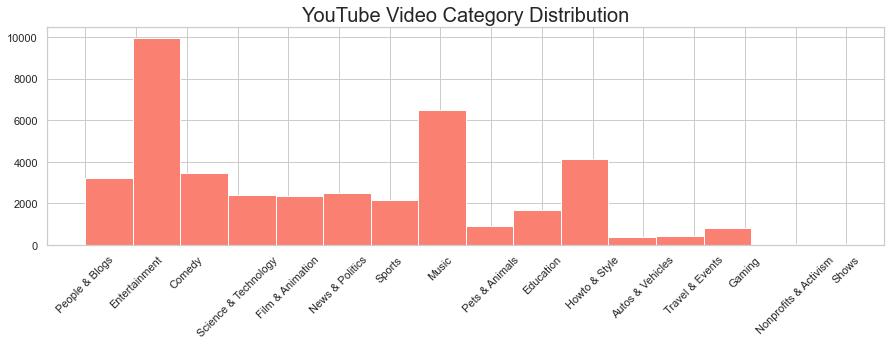

In [9]:
# Among the vast amount of trending videos, what kinds of contents are the most or least common category? 

plt.rcParams['figure.figsize'] = (15, 4)  
sns.set_style("whitegrid")

plt.hist(data['category'], bins = len(data['category'].unique()), color = 'salmon')
plt.xticks(rotation = 45)
plt.title("YouTube Video Category Distribution", fontsize = 20);

# Entertainment is the most common type of trending videos followed by music and howto & style types.
# Nonprofits & Activisim and shows were the least common types of trending videos.

### - <a id='Number'></a>Number of Trending Days Distribution

In [10]:
# Generally, famous videos are recommended as trending videos for more than just one day. How many days are the 
# videos nominated as trending videos?

trending = data.groupby("video_id").trending_date.describe()
trending

,count,unique,top,freq,first,last
video_id,,,,,,
-0CMnp02rNY,6,6,2018-06-11,1,2018-06-06,2018-06-11
-0NYY8cqdiQ,1,1,2018-02-01,1,2018-02-01,2018-02-01
-1Hm41N0dUs,3,3,2018-04-30,1,2018-04-29,2018-05-01
-1yT-K3c6YI,4,4,2017-11-30,1,2017-11-29,2017-12-02
-2RVw2_QyxQ,3,3,2017-11-16,1,2017-11-14,2017-11-16
...,...,...,...,...,...,...
zwEn-ambXLw,12,12,2018-04-02,1,2018-03-26,2018-04-06
zxUwbflE1SY,5,5,2017-11-16,1,2017-11-15,2017-11-19
zxwfDlhJIpw,23,23,2018-05-14,1,2018-05-02,2018-05-25


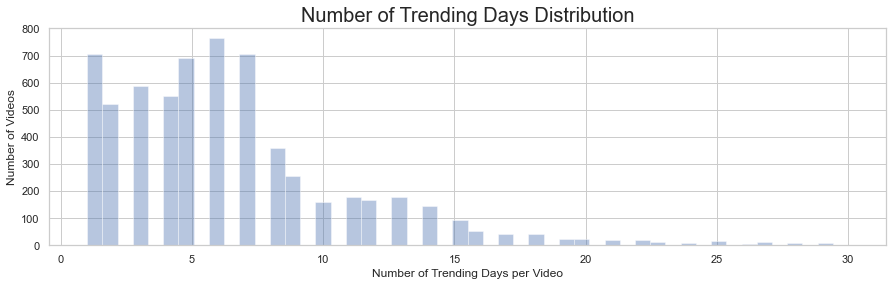

In [11]:
sns.distplot(trending['count'], kde = False).set_title("Number of Trending Days Distribution", fontsize = 20)
plt.ylabel("Number of Videos")
plt.xlabel("Number of Trending Days per Video");

# The distribution is clearly right skewed whose mean is greater than its median. Most of the trending videos have 
# less than 10 trending days, but some videos have even more than 25 trending days.

### - <a id='Top10'></a>Top 10 Most Viewed, Liked, Disliked and Commented Videos

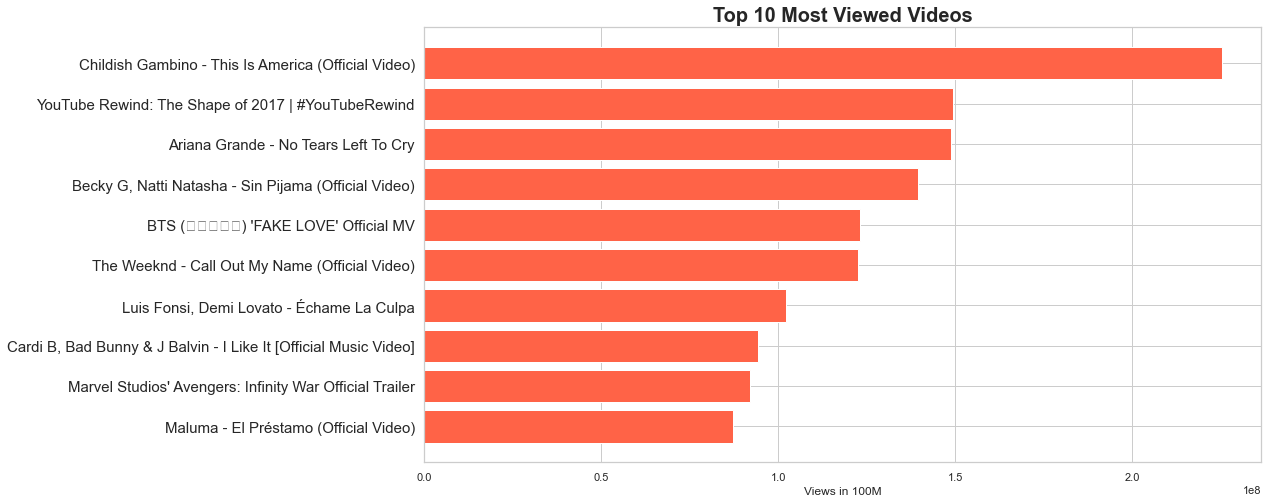

In [12]:
import warnings
warnings.filterwarnings("ignore")

top_10_views = data.sort_values(by = 'views', ascending = False).drop_duplicates('title')[:10]

plt.figure(figsize = (15,8))
plt.barh(top_10_views['title'][::-1], top_10_views['views'][::-1], color = 'tomato')
plt.title("Top 10 Most Viewed Videos", fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 15)
plt.xlabel("Views in 100M", fontsize = 12);

# The #1 most viewed video recorded more than 200 million views. Most of the videos in this ranking are music videos 
# of global singers such as BTS or Ariana Grande.

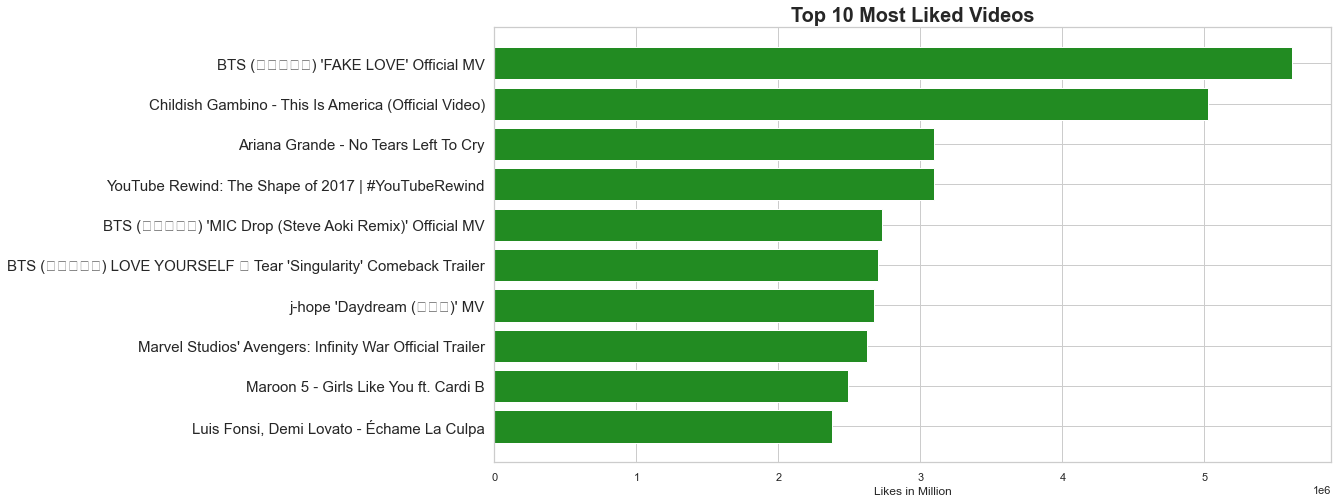

In [13]:
top_10_likes = data.sort_values(by = 'likes', ascending = False).drop_duplicates('title')[:10]

plt.figure(figsize = (15,8))
plt.barh(top_10_likes['title'][::-1], top_10_likes['likes'][::-1], color = 'forestgreen')
plt.title("Top 10 Most Liked Videos", fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 15)
plt.xlabel("Likes in Million", fontsize = 12);

# For the likes part, BTS dominates the ranking with four MVs, one of which is the #1 most liked video (j-hope on 7th
# is also BTS).

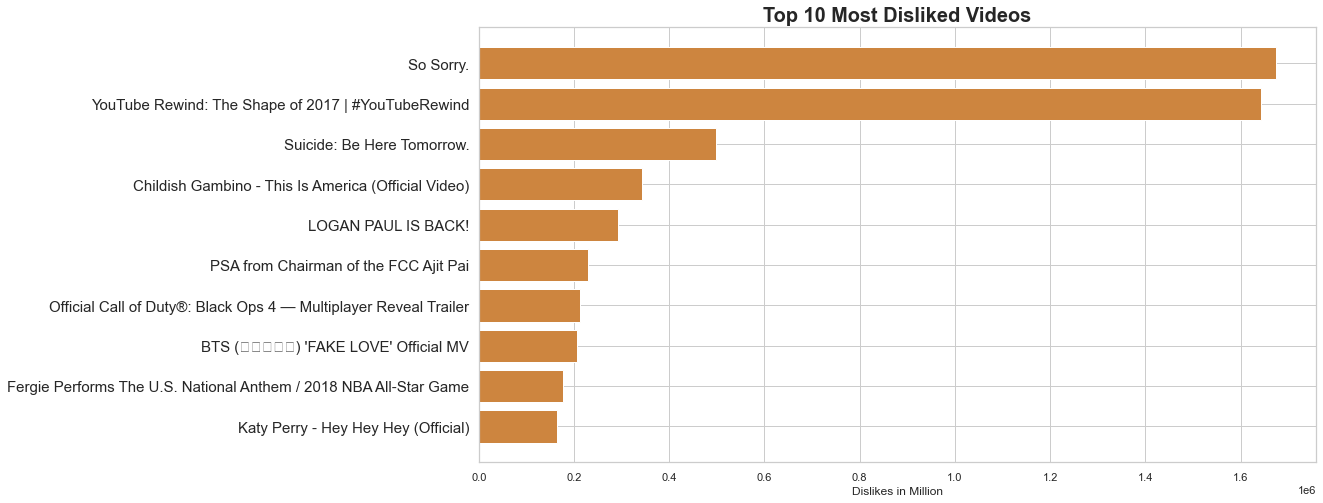

In [14]:
top_10_dislikes = data.sort_values(by = 'dislikes', ascending = False).drop_duplicates('title')[:10]

plt.figure(figsize = (15,8))
plt.barh(top_10_dislikes['title'][::-1], top_10_dislikes['dislikes'][::-1], color = 'peru')
plt.title("Top 10 Most Disliked Videos", fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 15)
plt.xlabel("Dislikes in Million", fontsize = 12);

# For the dislikes ranking, a video called 'So Sorry' is the most hated video whose channel is someone's vlog. The 
# title implies that the channel's operator possibly apologizes with the video, and the viewers expressed their 
# feelings with dislikes, potentially. Also, Youtube Rewind video is ranked in both most views & likes, but the number
# of dislikes is very significant.

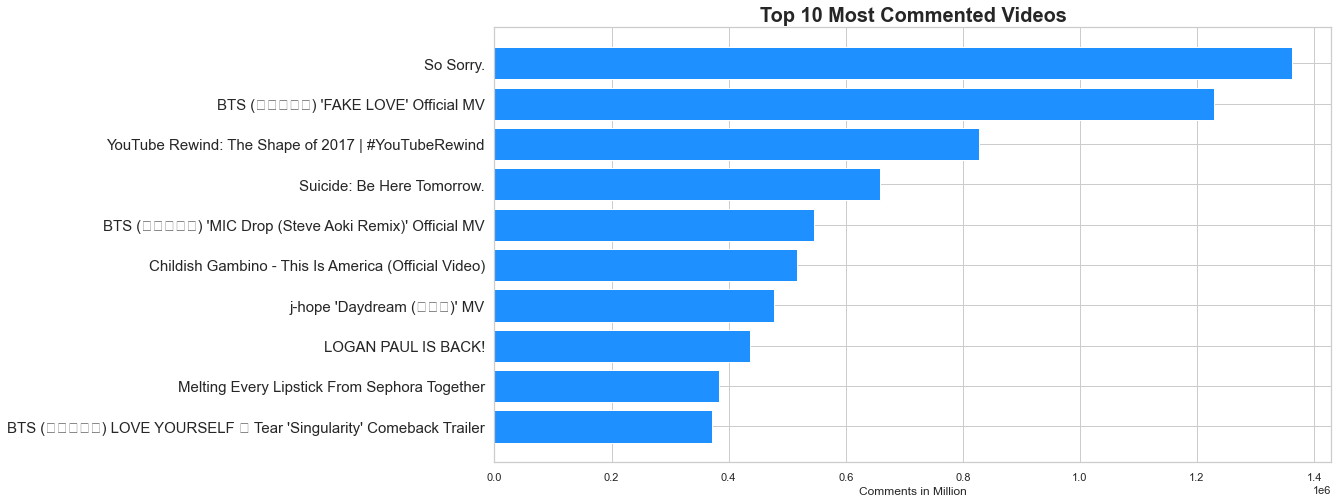

In [15]:
top_10_commented = data.sort_values(by = 'comment_count', ascending = False).drop_duplicates('title')[:10]

plt.figure(figsize = (15,8))
plt.barh(top_10_commented['title'][::-1], top_10_commented['comment_count'][::-1], color = 'dodgerblue')
plt.title("Top 10 Most Commented Videos", fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 15)
plt.xlabel("Comments in Million", fontsize = 12);

# As we previously discussed, 'So Sorry' video seems controversial with the most comments. The most commented ranking
# has videos from both likes and dislikes ranking above.

### - <a id='Daily'></a>Daily Views, Likes, Dislikes, Comments

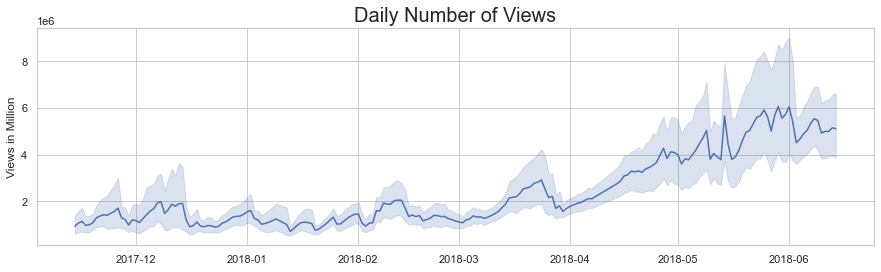

In [16]:
# Since the unit of views is much more gigantic than that of the others, the graphs of views are separately plotted.

views = data.set_index("trending_date")['views']
LDC = data.set_index("trending_date")[['likes', 'dislikes', 'comment_count']]

sns.lineplot(data = views)
plt.title("Daily Number of Views", fontsize = 20)
plt.ylabel("Views in Million")
plt.xlabel("");

# Note that the repeated values in each month are aggregated so that the graph becomes more readable along with mean
# and 95% confidence interval.

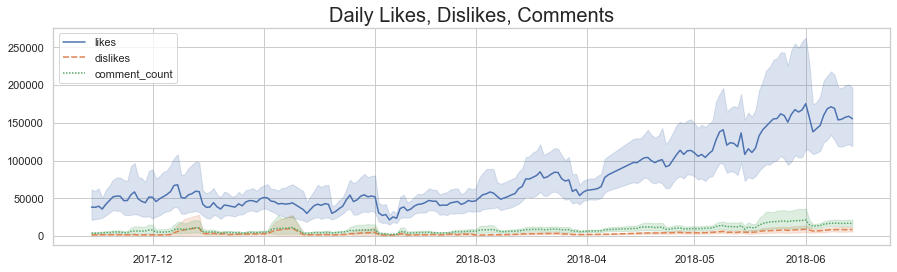

In [17]:
sns.lineplot(data = LDC).set_title("Daily Likes, Dislikes, Comments", fontsize = 20)
plt.legend(loc = 'upper left')
plt.xlabel("");

# YouTube users tend to hit many more likes than dislikes and comments. Similar to the views, they also constantly
# increase as time goes on.

### - <a id='Monthly'></a>Monthly Views, Likes, Dislikes, Comments

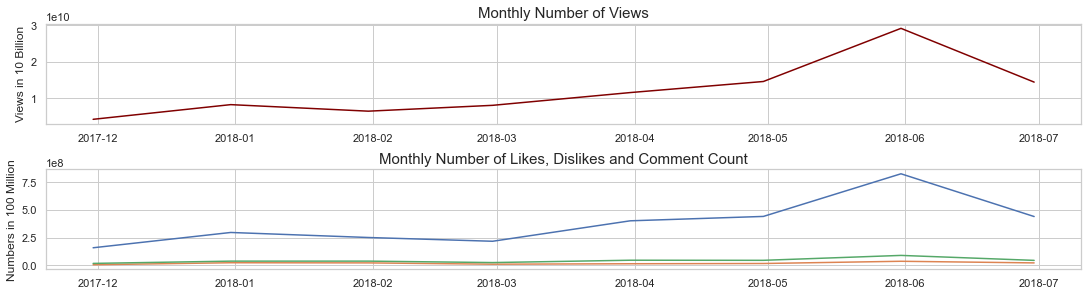

In [18]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].plot(views.resample("M").sum(), color = 'maroon')
axs[0].set_title("Monthly Number of Views", fontsize = 15)
axs[0].set_ylabel("Views in 10 Billion")

axs[1].plot(LDC.resample("M").sum())
axs[1].set_title("Monthly Number of Likes, Dislikes and Comment Count", fontsize = 15)
axs[1].set_ylabel("Numbers in 100 Million");

# The numbers consistently increases over time. There was a peak point in May 2018, and the number of views goes down
# to where it used to be in the following month. We can assume that some trending videos in this period brought 
# significant attentions and interests of YouTube users.

### - <a id='Average'></a>Average Views, Likes, Dislikes, Comments by Time

In [19]:
# Next, we'll review those four statistics by time to see what time the videos are mostly interacted with the users.
# The dataset is grouped by time with the corresponding average values.
by_time_df = data.set_index("publish_time")[['views', 'likes', 'dislikes', 'comment_count']]

by_time = by_time_df.groupby(by_time_df.index.time).mean()
by_time.head()

,views,likes,dislikes,comment_count
00:00:00,1.558466e+05,7380.764706,150.588235,497.529412
00:00:01,2.988024e+06,45572.173913,605.282609,5181.673913
00:00:02,8.903155e+05,30167.586207,857.413793,3514.965517
00:00:03,7.144898e+05,14806.458333,420.666667,2655.083333
00:00:04,1.925986e+05,7862.037037,146.444444,1401.037037


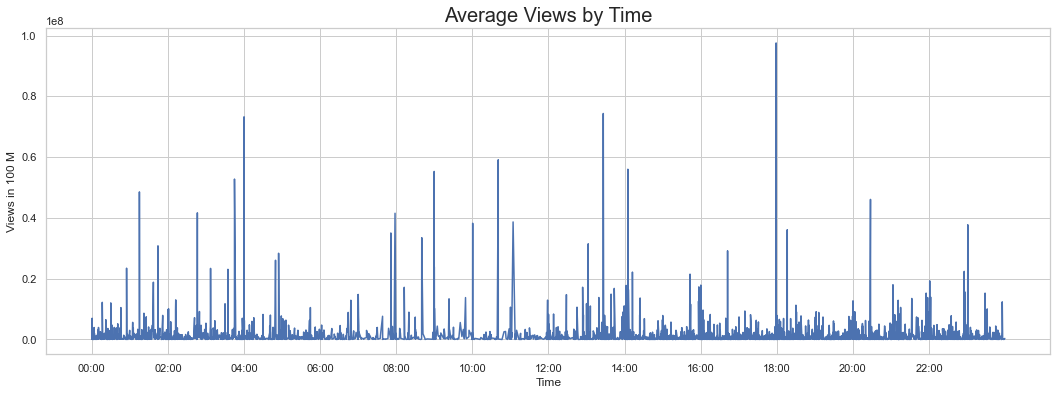

In [20]:
pd.options.display.max_rows = 12

hourly_ticks = 2 * 60 * 60 * np.arange(12)

fig, ax = plt.subplots(figsize=(18,6))

by_time['views'].plot(xticks=hourly_ticks, ax=ax)
plt.title("Average Views by Time", fontsize = 20)
plt.ylabel("Views in 100 M")
plt.xlabel("Time");

# We can observe what time many users viewed the videos such as 6 pm, 1:30 pm, even 4 am, etc. Notice there are many
# views even in the dawn time (1 am - 4 am).

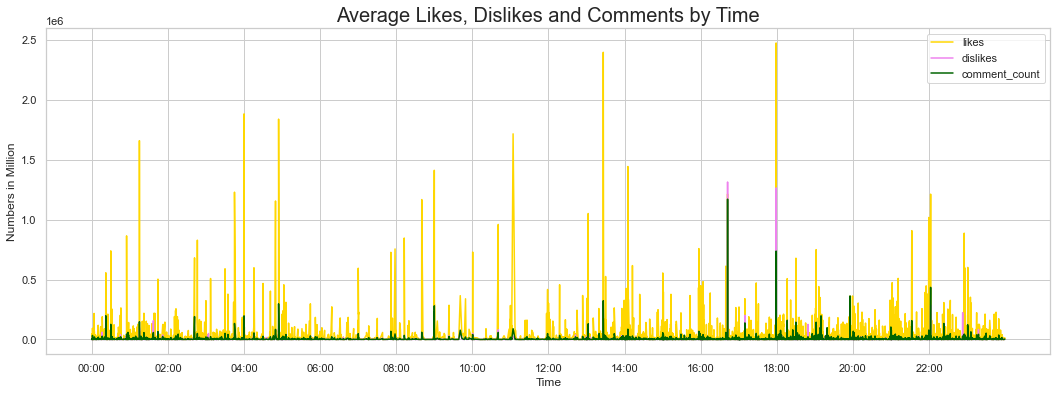

In [21]:
fig, ax = plt.subplots(figsize=(18,6))

by_time[['likes', 'dislikes', 'comment_count']].plot(xticks=hourly_ticks, color = ["gold", 'violet', 'darkgreen'], 
                                                     ax=ax)
plt.title("Average Likes, Dislikes and Comments by Time", fontsize = 20)
plt.xlabel("Time")
plt.ylabel("Numbers in Million");

# Likes are pretty similar to views above. Moreover, during the evening time (5 pm - 10 pm), users actively left 
# comments or hit dislikes compared to the rest of time.

### - <a id='Average2'></a>Average Views, Likes, Dislikes, Comments by Weekday vs. by Weekend

In [22]:
# In addition to the statistics by time, let's explore them in more detail with weekend and weekend. We'll check if
# there's any difference between weekday and weekend.

weekend = np.where(by_time_df.index.weekday < 5, 'Weekday', 'Weekend')

by_time = by_time_df.groupby([weekend, by_time_df.index.time]).mean()
by_time

views         likes     dislikes  comment_count
Weekday 00:00:00  1.620081e+05   8120.517241   141.551724     527.068966
        00:00:01  3.957537e+06  58811.666667   790.787879    6885.909091
        00:00:02  6.425800e+04   1889.000000    40.000000     145.200000
        00:00:03  7.144898e+05  14806.458333   420.666667    2655.083333
        00:00:04  1.925986e+05   7862.037037   146.444444    1401.037037
...                        ...           ...          ...            ...
Weekend 23:55:21  1.238089e+07   3234.428571   260.857143     347.571429
        23:55:58  4.400157e+05  21683.142857  1131.571429    1997.000000
        23:57:32  1.434124e+05   1043.181818   238.818182     223.181818
        23:58:50  6.915833e+04   2007.333333   219.666667    2252.000000
        23:59:22  3.063627e+05  13914.384615   556.307692    1534.538462

[4658 rows x 4 columns]

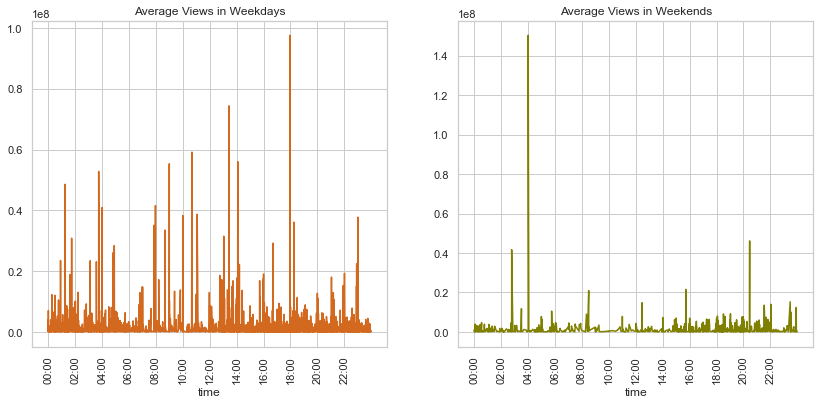

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

by_time['views'].loc['Weekday'].plot(ax=ax[0], title='Average Views in Weekdays', rot=90, xticks=hourly_ticks, 
                                     color = 'chocolate')
by_time['views'].loc['Weekend'].plot(ax=ax[1], title='Average Views in Weekends', rot=90, xticks=hourly_ticks, 
                                     color = 'olive');

# There are distinct differences in views between weekdays and weekends. Views in weekdays relatively have many peak
# times, one of which is 6 pm. On the other hand, views in weekends seem to be less than views in weekdays whose peak
# time is 4 am. However, the average view at this time is higher than any of the average view in weekdays.

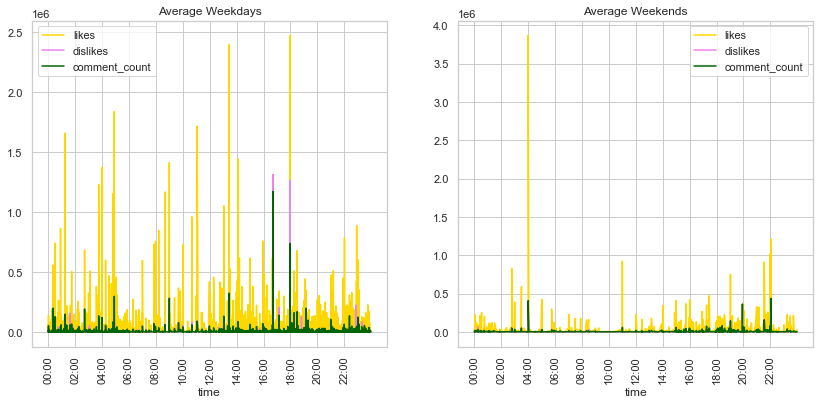

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

by_time[['likes', 'dislikes', 'comment_count']].loc['Weekday'].plot(ax=ax[0], title='Average Weekdays', rot=90, 
                                                                    xticks=hourly_ticks, 
                                                                    color = ["gold", 'violet', 'darkgreen'])


by_time[['likes', 'dislikes', 'comment_count']].loc['Weekend'].plot(ax=ax[1], title='Average Weekends', rot=90, 
                                                                    xticks=hourly_ticks, 
                                                                    color = ["gold", 'violet', 'darkgreen']);

# We previously mentioned that users tend to leave comments and hit dislikes in the evening time, but that seems to
# apply to weekdays only. Compared to the weekdays, weekend users seldom leave comments or hit dislikes during the 
# evening time. Also, these graphs are pretty similar to the views graphs above again.

### - <a id='Heatmap'></a>Correlation Heatmap

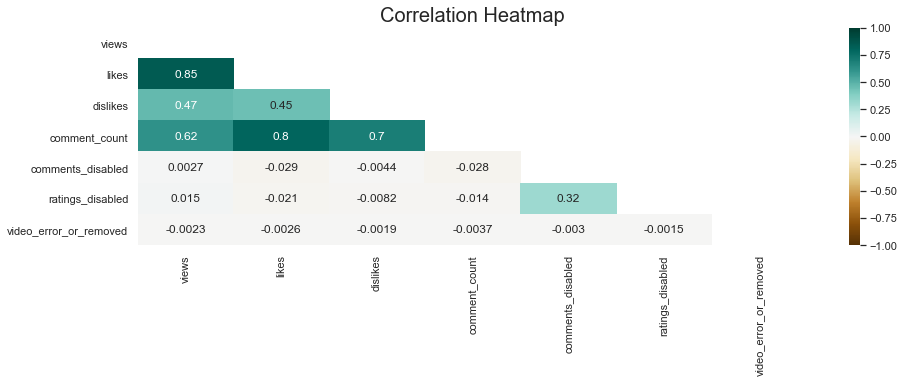

In [42]:
ax = sns.heatmap(data.corr(), mask = np.triu(data.corr()), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
ax.set_title('Correlation Heatmap', fontsize = 20);

# There's no column that has clear negative correlation. However, there are some meaningful positive correlations such
# as views & likes, likes & comment_count and dislikes & comment_count.

## <a id='NLP'></a>Natural Language Processing (Text Analysis)

### - <a id='200Tags'></a>Word Cloud for Top 200 Tags

In [45]:
# As we observed the dataset before, 'tags' are separated with '|', so those are splitted with '|'.

tag_list = list(data['tags'].apply(lambda x:x.split('|')))
tag_list[:5]     # First five as an example

[['SHANtell martin'],
 ['last week tonight trump presidency',
  '"last week tonight donald trump"',
  '"john oliver trump"',
  '"donald trump"'],
 ['racist superman',
  '"rudy"',
  '"mancuso"',
  '"king"',
  '"bach"',
  '"racist"',
  '"superman"',
  '"love"',
  '"rudy mancuso poo bear black white official music video"',
  '"iphone x by pineapple"',
  '"lelepons"',
  '"hannahstocking"',
  '"rudymancuso"',
  '"inanna"',
  '"anwar"',
  '"sarkis"',
  '"shots"',
  '"shotsstudios"',
  '"alesso"',
  '"anitta"',
  '"brazil"',
  '"Getting My Driver\'s License ',
  ' Lele Pons"'],
 ['rhett and link',
  '"gmm"',
  '"good mythical morning"',
  '"rhett and link good mythical morning"',
  '"good mythical morning rhett and link"',
  '"mythical morning"',
  '"Season 12"',
  '"nickelback lyrics"',
  '"nickelback lyrics real or fake"',
  '"nickelback"',
  '"nickelback songs"',
  '"nickelback song"',
  '"rhett link nickelback"',
  '"gmm nickelback"',
  '"lyrics (website category)"',
  '"nickelback (music

In [46]:
# Next, all the tags are combined in a single list
tag_list2 = []

for tag in tag_list:
    for j in range(len(tag)):
        tag_list2.append(tag[j])
        
tag_list2[:5]     # First five as an example

['SHANtell martin',
 'last week tonight trump presidency',
 '"last week tonight donald trump"',
 '"john oliver trump"',
 '"donald trump"']

In [47]:
# Unify all the words in lower cases and remove double quotes
tag_list3 = [tag.lower().strip('"') for tag in tag_list2]

# Exclude '[none]' from the list
tag_series = pd.Series(tag_list3)[pd.Series(tag_list3) != '[none]'].value_counts()
tag_series[:5]     # First five as an example

funny     4142
comedy    3647
how to    1702
music     1664
pop       1634
dtype: int64

In [52]:
# Save top 200 tags in a dictionary along with the counts
tag_top_200 = tag_series[:200]
tag_dict = dict(tag_top_200)
list(tag_dict.items())[:5]     # First five as an example

[('funny', 4142),
 ('comedy', 3647),
 ('how to', 1702),
 ('music', 1664),
 ('pop', 1634)]

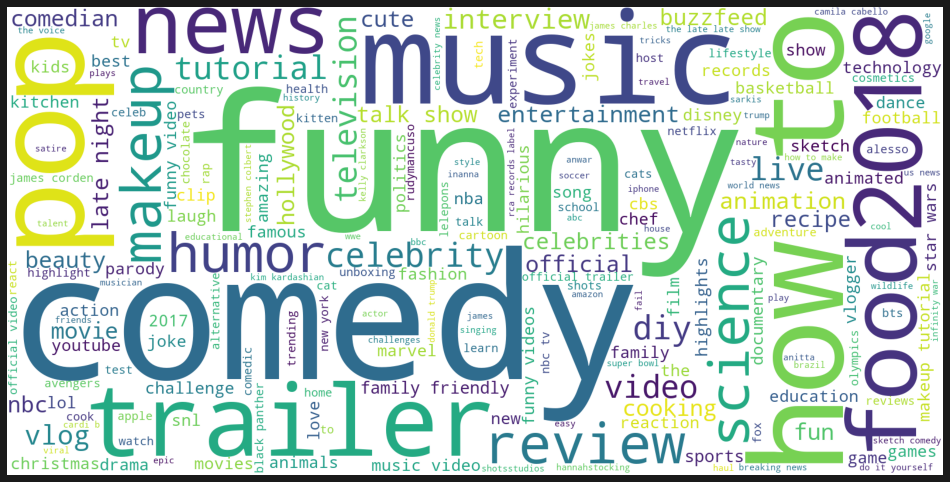

In [29]:
from wordcloud import WordCloud

wc = WordCloud(width = 1600, height = 800, background_color = 'white').generate_from_frequencies(tag_dict)

array = wc.to_array()
plt.figure(figsize = (13,10), facecolor = 'k')
plt.imshow(array)
plt.axis("off")
plt.tight_layout(pad = 0);

# The keywords regarding entertainment are the most distinct in the word cloud such as funny', 'comedy', 'music',
# 'pop', etc. We can also see keywords of sharing know-how such as 'how to', 'food', 'cooking', 'makeup' and so on. 

### - <a id='Sentiment'></a>Sentiment Analysis (Polarity & Subjectivity) for 500 Descriptions

In [30]:
from textblob import TextBlob

desc_list = []

# Due to the huge volume of data, I only took first 500 descriptions into account.
for desc in data.description[:500]:
    desc_list.append((desc, TextBlob(desc).sentiment.polarity, TextBlob(desc).sentiment.subjectivity))
    sentiment_df = pd.DataFrame(desc_list, columns = ['sentence','polarity', 'subjectivity'])
    
sentiment_df

# Each description has come up with its polarity and subjectivity scores. We'll need to classify poliarity into 
# positive, neutral and negative. Then, the subjectivity will be divided into subjectivity and objectivity thereafter.

,sentence,polarity,subjectivity
0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.166667,0.494444
1,"One year after the presidential election, John...",0.079167,0.345833
2,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.145833,0.333333
3,Today we find out if Link is a Nickelback amat...,-0.017330,0.422443
4,I know it's been a while since we did this sho...,0.459091,0.338636
...,...,...,...
495,The Dallas Cowboys battle the Atlanta Falcons ...,0.096429,0.653571
496,Finally took the Miura to Carmax! Hope you enj...,0.250000,0.944444
497,I really enjoy doing clothing hauls/try on vid...,0.333333,0.650000
498,A powerful 7.3 magnitude earthquake near the I...,0.179592,0.553061


In [31]:
def polarity_score(sentiment_df):
    if sentiment_df['polarity'] > 0:
        polarity = "Positive"
    elif sentiment_df['polarity'] == 0:
        polarity = "Neutral"
    else:
        polarity = "Negative"
    return polarity

def subjectivity_score(sentiment_df):
    if sentiment_df['subjectivity'] < 0.5:
        subjectivity = 'Objective'
    elif sentiment_df['subjectivity'] == 0.5:
        subjectivity = 'Neutral'
    else:
        subjectivity = 'Subjective'
    return subjectivity

sentiment_df['polarity_classified'] = sentiment_df.apply(polarity_score, axis = 1)
sentiment_df['subjectivity_classified'] = sentiment_df.apply(subjectivity_score, axis = 1)

sentiment_df

,sentence,polarity,subjectivity,polarity_classified,subjectivity_classified
0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.166667,0.494444,Negative,Objective
1,"One year after the presidential election, John...",0.079167,0.345833,Positive,Objective
2,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.145833,0.333333,Positive,Objective
3,Today we find out if Link is a Nickelback amat...,-0.017330,0.422443,Negative,Objective
4,I know it's been a while since we did this sho...,0.459091,0.338636,Positive,Objective
...,...,...,...,...,...
495,The Dallas Cowboys battle the Atlanta Falcons ...,0.096429,0.653571,Positive,Subjective
496,Finally took the Miura to Carmax! Hope you enj...,0.250000,0.944444,Positive,Subjective
497,I really enjoy doing clothing hauls/try on vid...,0.333333,0.650000,Positive,Subjective
498,A powerful 7.3 magnitude earthquake near the I...,0.179592,0.553061,Positive,Subjective


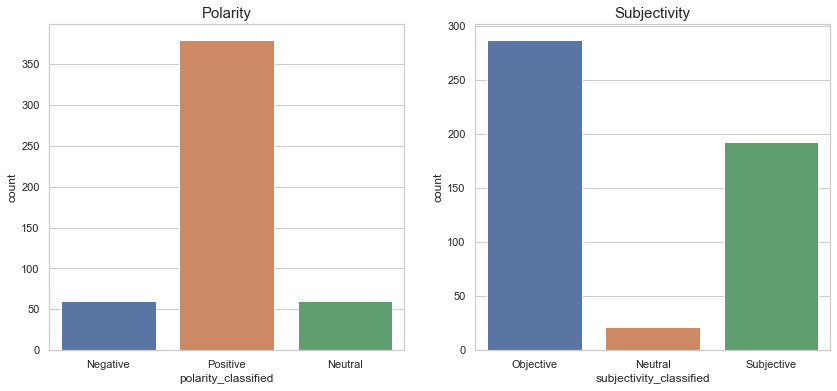

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax = ax[0], x = "polarity_classified", data = sentiment_df).set_title('Polarity', fontsize = 15)
sns.countplot(ax = ax[1], x = 'subjectivity_classified', data = sentiment_df).set_title('Subjectivity', fontsize = 15);

# The descriptions are mostly positive descriptions with few negative and neutral ones. In term of subjectivity, there
# are a bit more objective descriptions than subjective ones with few neutral ones.

### - <a id='Topics'></a>Topics of 500 Descriptions

In [33]:
# Create one big string concatenating first 500 descriptions

desc_str = ''

for desc in data.description[:500]:
    desc_str += (' ' + desc)

" SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\\nWIDE LENS; http://tinyurl.com/jkfcm8t\\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\\nSMALL CAMERA; http://tinyurl.com/hrrzhor\\nMICROPHONE; http://tinyurl.com/zefm4jy\\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\\n\\nfollow me; on http://instagram.com/caseyneistat\\non https://www.facebook.com/cneistat\\non https://twi

In [34]:
# Clean up the text

import re

no_space = re.compile("[.;:!\'?,\"()\[\]]")
with_space = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# Remove urls
desc_str = re.sub(r'http\S+', '', desc_str)
# Remove numbers
desc_str = re.sub('[0-9]', '', desc_str)
# Remove | and arrows
desc_str = re.sub('[|▶►▼]', '', desc_str)
# Remove double backslash n
desc_str = desc_str.replace("\\n", "")
# Apply character without space
desc_str = no_space.sub("", desc_str.lower())
# Apply character with space
desc_str = with_space.sub('', desc_str)

' shantells channel     this video in k on this   this lens   drone   gear    camera  camera  lens  sony camera  canon camera  tripod thing  need this for the bendy tripod  lens  expensive wide lens  camera   microphone  drone cheaper but still great me on    intro song by  disclosure  this is not an ad  not selling or promoting anything  but samsung did produce the shantell video as a galaxy project which is an initiative that enables creators like shantell and me to make projects we might otherwise not have the opportunity to make  hope thats clear  if not ask in the comments and ill answer any specifics one year after the presidential election john oliver discusses what weve learned so far and enlists our catheter cowboy to teach donald trump what he hasntconnect with last week tonight onlinesubscribe to the last week tonight youtube channel for more almost news as it almost happens wwwyoutubecomuserlastweektonightfind last week tonight on facebook like your mom would  us on twitter

In [53]:
# Tokenize and remove stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

desc_tokens = word_tokenize(desc_str)
desc_no_stopword = [word for word in desc_tokens if not word in stopwords.words()]

desc_no_stopword[:5]     # First five as an example

['shantells', 'channel', 'video', 'lens', 'drone']

In [54]:
# Only nouns will be extracted for topic

description = ' '.join(desc_no_stopword)

blob = TextBlob(description)

nouns = list()

for word, tag in blob.tags:
    if tag == 'NN':
        nouns.append(word.lemmatize())
        
noun_dict = dict(pd.Series(nouns).value_counts())

list(noun_dict.items())[:5]     # First five as an example

[('video', 251),
 ('music', 160),
 ('twitter', 115),
 ('facebook', 113),
 ('show', 86)]

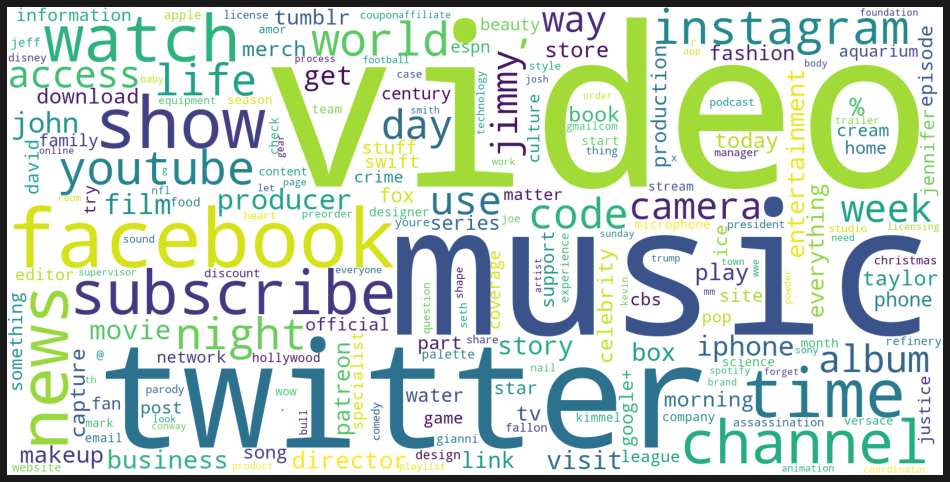

In [37]:
wc2 = WordCloud(width = 1600, height = 800, background_color = 'white').generate_from_frequencies(noun_dict)

array2 = wc2.to_array()
plt.figure(figsize = (13,10), facecolor = 'k')
plt.imshow(array2)
plt.axis("off")
plt.tight_layout(pad = 0);

# The description is mostly about video, music, twitter, facebook, etc.

## <a id='Predictive'></a>Predictive Analysis

### - <a id='Linear'></a>Linear Regression 
- predicting number of likes based on views, dislikes and comment counts

In [39]:
# The dataset is splitted into train and test data with the test size of 20%

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_lm = data[['views', 'dislikes', 'comment_count']]
y_lm = data['likes']

X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X_lm, y_lm, test_size = 0.2, random_state = 0)

In [40]:
# With the pipeline, the train data are scaled and fitted in the linear regression

pipe_lm = make_pipeline(StandardScaler(), LinearRegression())

pipe_lm.fit(X_lm_train, y_lm_train)

y_lm_pred = pipe_lm.predict(X_lm_test)

print('Test Accuracy: {:.3f}'.format(pipe_lm.score(X_lm_test, y_lm_test)))

Test Accuracy: 0.884


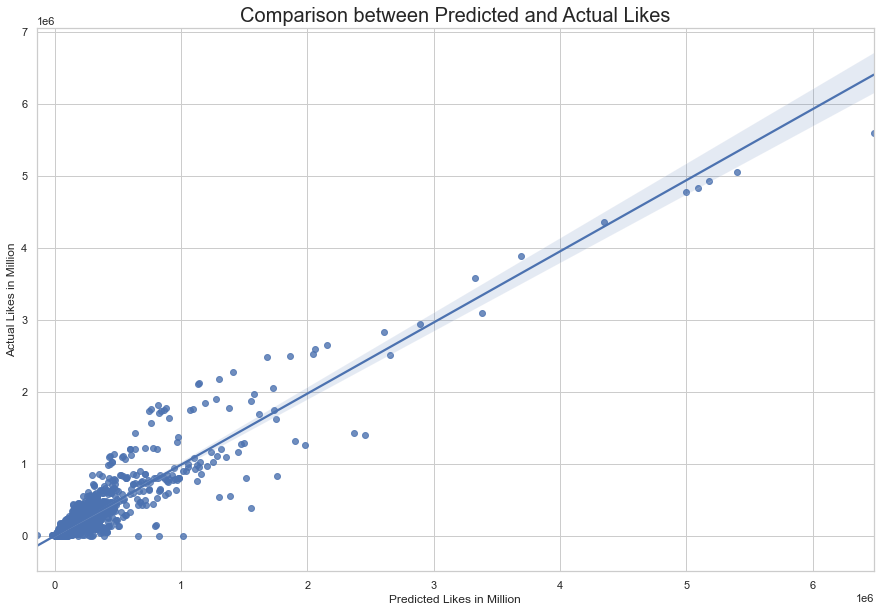

In [43]:
plt.figure(figsize=(15,10))
sns.regplot(y_lm_pred, y_lm_test, fit_reg=True)
plt.xlabel('Predicted Likes in Million')
plt.ylabel('Actual Likes in Million')
plt.title("Comparison between Predicted and Actual Likes", fontsize = 20);